In [1]:
import sys
import pathlib
pth=str(pathlib.Path().absolute())
sys.path.append(('\\').join(pth.split('\\')[:-1])+"\\Utils")
from Utilities import *
import numpy as np
from skimage import io
from skimage import color
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage import morphology
from skimage.transform import rotate
import json
import cv2
from scipy import stats

In [27]:
def mo(a):
    hist, bins = np.histogram(a, bins = 50, range = (0., 255.0))
    i = np.argmax(hist)
    return (bins[i]+bins[i+1])/2
def w_analizer(name, di, ROI, w_thresh = 245, verbose = False, plot = False):
    img = io.imread(di)
    ROI = io.imread(ROI)

    f1=open("C:\\UNI\\Labo\\Liiarpi_1-master\\validcrop.txt","r")
    lines=f1.readlines()
    linesn=np.array(lines)
    linesn=np.delete(lines,np.where(linesn=="\n"))
    linesn=linesn.reshape(-1,3)
    linesnc=v_replace_err(linesn)
    linesnc=np.vectorize(pyfunc=lambda x:np.array([x[0].split('\n')[0]]),signature="(n)->(m)")(linesnc.reshape(-1,1)).reshape(-1,3)
    xywh=linesnc[:,:2]
    imgnames=linesnc[:,2]
    xywh=v_no_spaces(xywh)

    xywh=np.vectorize(pyfunc=(lambda x:float(x)))(xywh.reshape(1,-1)[0])
    xywh=xywh.reshape(-1,4).astype(int)+1

    mr=xywh[np.where(imgnames==(name+".jpg"))][0]
    #print(mr)
    mask=assemble_mask(mr,img,ROI)
    mask1 = np.sum(mask, axis = 2)
    mask1 = mask1>1
    m_slic = slic(image = img, n_segments = 20, sigma = 5, slic_zero = True, mask = mask1)   
    rww = np.max(mask1, axis = 1)
    cww = np.max(mask1, axis = 0)
    rl = np.argmax(rww)
    rh = img.shape[0]-np.argmax(rww[::-1])
    cl = np.argmax(cww)
    ch = img.shape[1]-np.argmax(cww[::-1])
    #print(rl, rh)
    #print(cl, ch)
    img1 = img[rl:rh, cl:ch, :]
    m_slic1 = m_slic[rl:rh, cl:ch]
    N = np.unique(m_slic.flatten())
    img2 = img1.reshape(-1, 3)
    m_slic2 = m_slic1.flatten()
    for i in range(1, len(N)):
 
        al = img2[m_slic2==i]
        ale = al[(al<250).all(axis = 1)]
        ele = al[(np.abs(stats.zscore(al)) > 2.5).all(axis=1)]
        wp = 100-(ale.shape[0]*100/al.shape[0])
        if (verbose) or abs(wp-0.00)>1e-5:
            if (plot):
                el = m_slic1==i
                el = el.astype(np.uint8)
                plt.figure()
                plt.imshow(cv2.bitwise_and(img1, img1, mask = el))
                plt.show()
            print(f"--------Segmento {i}--------") 
            print(f"Porcentaje de blancos: {wp:.2f}%")
            print("Media antes y despues")
            print("RGB: ", np.mean(al, axis = 0), np.mean(ale, axis = 0))
            print("LAB: ", np.mean(color.rgb2lab([[al]]).reshape(-1, 3), axis = 0), np.mean(color.rgb2lab([[ale]]).reshape(-1, 3), axis = 0))
            print("HSV: ", np.mean(color.rgb2hsv(np.array([[al]])).reshape(-1, 3), axis = 0), np.mean(color.rgb2hsv(np.array([[ale]])).reshape(-1, 3), axis = 0))
            print("------------------------------------------")
            print("Std antes y despues")
            print("RGB: ", np.std(al, axis = 0), np.std(ale, axis = 0))
            print("LAB: ", np.std(color.rgb2lab([[al]]).reshape(-1, 3), axis = 0), np.std(color.rgb2lab([[ale]]).reshape(-1, 3), axis = 0))
            print("HSV: ", np.std(color.rgb2hsv(np.array([[al]])).reshape(-1, 3), axis = 0), np.std(color.rgb2hsv(np.array([[ale]])).reshape(-1, 3), axis = 0))
            print("------------------------------------------")
            print("Moda antes y despues")
            print((mo(al[:0]),mo(al[:1]), mo(al[:2])), (mo(ale[:0]),mo(ale[:1]), mo(ale[:2])))
            print(f"Outliers al 2.5 {(ele.shape[0]/al.shape[0]):.1f}")
            print("========================================================")
        


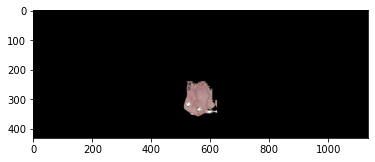

--------Segmento 12--------
Porcentaje de blancos: 3.10%
Media antes y despues
RGB:  [177.85310556 141.26953496 140.04365707] [175.43301774 137.78898683 136.75535967]
LAB:  [61.98734048 13.744629    6.02302234] [60.82321939 14.18718343  6.09157868]
HSV:  [0.31497152 0.21966301 0.69752932] [0.32083428 0.22528606 0.68798158]
------------------------------------------
Std antes y despues
RGB:  [19.52253104 25.41296393 24.43173819] [14.2922028  16.57229516 16.31800519]
LAB:  [8.73604359 4.13493618 1.58074546] [5.9133169  3.34226325 1.54834724]
HSV:  [0.44985525 0.05344805 0.0768047 ] [0.45566175 0.04377162 0.05609046]
------------------------------------------
Moda antes y despues
(2.55, 130.04999999999998, 135.14999999999998) (2.55, 130.04999999999998, 135.14999999999998)
Outliers al 2.5 0.0


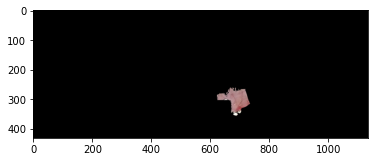

--------Segmento 13--------
Porcentaje de blancos: 2.54%
Media antes y despues
RGB:  [178.25634179 134.31317948 134.74594698] [176.29334638 131.29138943 131.99021526]
LAB:  [60.21525924 17.05003733  6.55468595] [59.2207994  17.50859324  6.59293825]
HSV:  [0.56701676 0.258539   0.69911778] [0.57814172 0.26386284 0.6913526 ]
------------------------------------------
Std antes y despues
RGB:  [18.19438284 26.96910079 26.06587849] [13.69695264 19.63519107 19.91158299]
LAB:  [8.89576742 6.19031565 3.22735375] [6.49243224 5.56012716 3.2390678 ]
HSV:  [0.48066757 0.08581682 0.07164254] [0.48172954 0.08012771 0.053745  ]
------------------------------------------
Moda antes y despues
(2.55, 130.04999999999998, 135.14999999999998) (2.55, 130.04999999999998, 135.14999999999998)
Outliers al 2.5 0.0


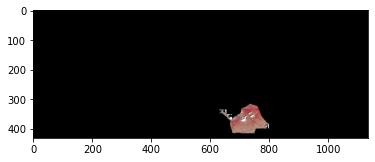

--------Segmento 18--------
Porcentaje de blancos: 3.76%
Media antes y despues
RGB:  [176.7924062  122.22792631 114.46978207] [173.78347146 117.26800514 109.62600677]
LAB:  [56.71035667 20.53514084 13.483695  ] [55.09399994 21.34700975 13.78709394]
HSV:  [0.17091778 0.3650615  0.6933921 ] [0.17221693 0.37689178 0.68152212]
------------------------------------------
Std antes y despues
RGB:  [23.38165266 38.30811443 35.69629213] [18.09271912 29.46601269 26.39615614]
LAB:  [12.16845675 10.5263249   4.06304826] [9.17720258 9.86105363 3.80553028]
HSV:  [0.33573334 0.13010553 0.0919602 ] [0.34201342 0.11753458 0.07100797]
------------------------------------------
Moda antes y despues
(2.55, 104.55, 104.55) (2.55, 104.55, 104.55)
Outliers al 2.5 0.0


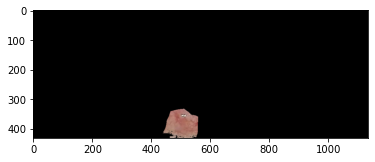

--------Segmento 19--------
Porcentaje de blancos: 0.36%
Media antes y despues
RGB:  [174.60431735 123.34594414 111.26705241] [174.31814629 122.91702959 110.83104411]
LAB:  [56.58850748 18.42443283 14.70478676] [56.44556644 18.48267643 14.73507135]
HSV:  [0.03310973 0.36399437 0.68472456] [0.03292307 0.36499464 0.68360233]
------------------------------------------
Std antes y despues
RGB:  [10.21419077 15.79988302 15.48064213] [ 9.03883674 14.09569018 13.67343204]
LAB:  [5.06440242 5.11385749 2.68560863] [4.47089803 5.02687709 2.64102986]
HSV:  [0.0197476  0.06620632 0.04004478] [0.01943491 0.06415419 0.03543415]
------------------------------------------
Moda antes y despues
(2.55, 124.94999999999999, 124.94999999999999) (2.55, 124.94999999999999, 124.94999999999999)
Outliers al 2.5 0.0


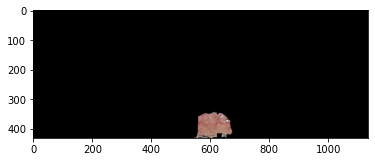

--------Segmento 20--------
Porcentaje de blancos: 0.66%
Media antes y despues
RGB:  [175.13749235 125.73675841 114.87681957] [174.60842261 124.97795838 114.1102081 ]
LAB:  [57.30186331 17.79040411 13.66812206] [57.04673284 17.8854521  13.71544848]
HSV:  [0.04651412 0.34650944 0.6868137 ] [0.04625791 0.34817289 0.68473891]
------------------------------------------
Std antes y despues
RGB:  [13.23147697 18.95189308 18.76401318] [11.56956327 16.52145976 16.25282169]
LAB:  [6.30483214 5.27558909 3.25187046] [5.48264924 5.14366492 3.20601767]
HSV:  [0.12045195 0.07382724 0.05188814] [0.12075685 0.07104853 0.04537084]
------------------------------------------
Moda antes y despues
(2.55, 155.55, 150.45) (2.55, 155.55, 150.45)
Outliers al 2.5 0.0


In [28]:
name='c1anemia-129'
di = "C:\\UNI\\Labo\\Liiarpi_1-master\\c1anemia-129.jpg"
ROI = "C:\\UNI\\Labo\\Liiarpi_1-master\\Sem_Auto1\\eye_c1anemia-129_13.0.jpg"
w_analizer(name = name, di = di, ROI = ROI, plot = True)

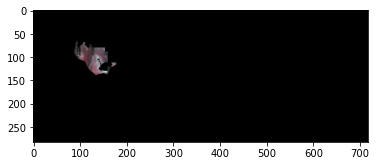

--------Segmento 4--------
Porcentaje de blancos: 0.03%
Media antes y despues
RGB:  [107.50102041  88.40544218  96.26054422] [107.45389588  88.3528411   96.20823409]
LAB:  [39.42829429  9.43010944 -1.29523394] [39.40896282  9.43255767 -1.29465367]
HSV:  [0.85855225 0.19914625 0.42759637] [0.85859324 0.19920448 0.42740828]
------------------------------------------
Std antes y despues
RGB:  [33.3490966  33.92510114 34.76431053] [33.2567548  33.81078941 34.6543451 ]
LAB:  [13.43205577  7.279804    2.28305441] [13.39338698  7.27983217  2.283226  ]
HSV:  [0.16301194 0.12244531 0.13298059] [0.16302453 0.12242543 0.13261162]
------------------------------------------
Moda antes y despues
(2.55, 43.349999999999994, 48.45) (2.55, 43.349999999999994, 48.45)
Outliers al 2.5 0.0


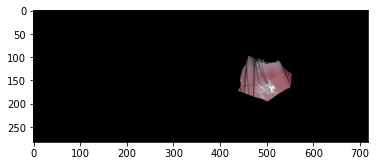

--------Segmento 9--------
Porcentaje de blancos: 0.44%
Media antes y despues
RGB:  [145.28919392 106.57636926 116.33683219] [144.81643687 105.92295215 115.73641525]
LAB:  [49.05671838 17.18204575  0.93521475] [48.83327192 17.26294862  0.9357522 ]
HSV:  [0.92547281 0.27690877 0.57002752] [0.92803519 0.27805237 0.56812599]
------------------------------------------
Std antes y despues
RGB:  [29.06258362 32.7900028  31.6002141 ] [28.24953191 31.36521062 30.36117634]
LAB:  [12.18667202  7.02934882  2.48103004] [11.7443581   6.93865454  2.48543722]
HSV:  [0.14474977 0.12090197 0.11434705] [0.13930825 0.119948   0.11099183]
------------------------------------------
Moda antes y despues
(2.55, 104.55, 104.55) (2.55, 104.55, 104.55)
Outliers al 2.5 0.0


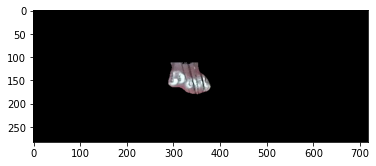

--------Segmento 11--------
Porcentaje de blancos: 6.76%
Media antes y despues
RGB:  [148.46674183 138.41736189 144.46426156] [141.70568319 130.09818622 136.52938331]
LAB:  [58.18558829  5.27419309 -1.66776151] [55.257698    5.91735676 -1.66958764]
HSV:  [0.77864167 0.12952483 0.59950483] [0.79734671 0.13536101 0.57071864]
------------------------------------------
Std antes y despues
RGB:  [42.82574704 52.45529253 50.69874125] [35.89745848 43.90440901 42.72971826]
LAB:  [18.92047651  7.12142373  1.91749329] [16.03648149  6.92532858  1.97273531]
HSV:  [0.19650718 0.09011794 0.18089128] [0.189188   0.0904092  0.15113872]
------------------------------------------
Moda antes y despues
(2.55, 124.94999999999999, 119.85) (2.55, 124.94999999999999, 119.85)
Outliers al 2.5 0.0


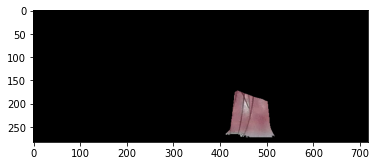

--------Segmento 18--------
Porcentaje de blancos: 0.23%
Media antes y despues
RGB:  [158.54550602 117.63241331 125.99617834] [158.33834586 117.32217336 125.70648319]
LAB:  [53.69843677 17.48264106  1.90650513] [53.59465708 17.52595468  1.91124592]
HSV:  [0.93903752 0.26274256 0.6220174 ] [0.94008124 0.26329597 0.6211639 ]
------------------------------------------
Std antes y despues
RGB:  [17.53480663 23.60091155 22.01764363] [17.00541103 22.71044721 21.18516316]
LAB:  [8.1783649  6.28688406 1.61836062] [7.89184002 6.22753326 1.61699799]
HSV:  [0.13507459 0.09790767 0.06901253] [0.13320714 0.09732461 0.06672212]
------------------------------------------
Moda antes y despues
(2.55, 53.55, 53.55) (2.55, 53.55, 53.55)
Outliers al 2.5 0.0


In [29]:
name='c1anemia-55'
di = "C:\\UNI\\Labo\\Liiarpi_1-master\\c1anemia-55.jpg"
ROI = "C:\\UNI\\Labo\\Liiarpi_1-master\\Sem_Auto1\\eye_c1anemia-55_11.5.jpg"
w_analizer(name = name, di = di, ROI = ROI, plot = True)